In [163]:
library(ggplot2)
library(scales)
options(repr.plot.height=6, repr.plot.width=10)

Go back 20 years.

In [164]:
data = read.csv('../data/senate-bip-score/data.csv')

data$date <- as.Date(data$date)
data <- data[data$date > as.Date('2001-05-27'),]

Find bills with at least one cosponsor from the opposite party.

In [165]:
dem_bip <- data[data$sponsor_party == "D" & data$gop_cosponsors > 0, c("date", "gop_cosponsors")]
gop_bip <- data[data$sponsor_party == "R" & data$dem_cosponsors > 0, c("date", "dem_cosponsors")]

names(dem_bip)[2]<- "opp_cosponsor"
names(gop_bip)[2] <- "opp_cosponsor"
bip <- rbind(dem_bip, gop_bip)

bip <- bip[order(bip$date),]

### Weighted

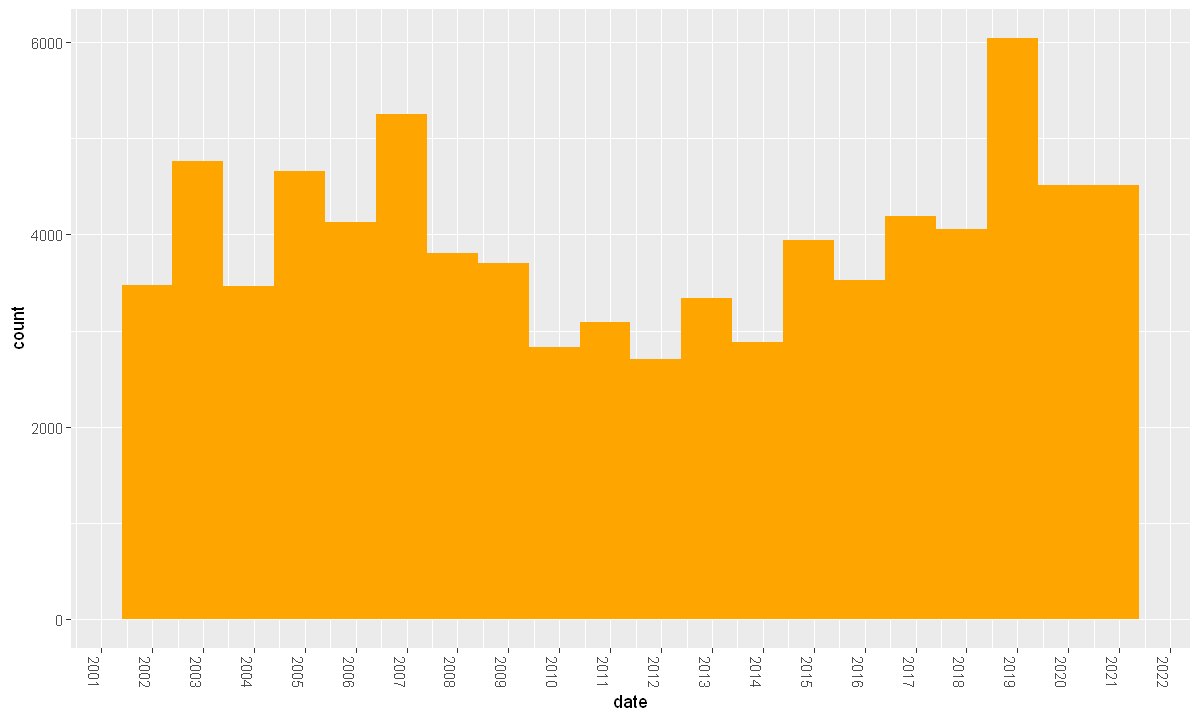

In [168]:
ggplot(bip, aes(date, weight=opp_cosponsor)) + 
geom_histogram( fill='orange', breaks=seq(as.Date('2001-05-27'), as.Date('2021-05-27'), by= "1 years")) +
scale_x_date(labels=date_format("%Y"), breaks=date_breaks('year')) +
theme(axis.text.x=element_text(angle = -90, hjust = 0))

Plot without weighting by number of cosponsors.

### unweighted

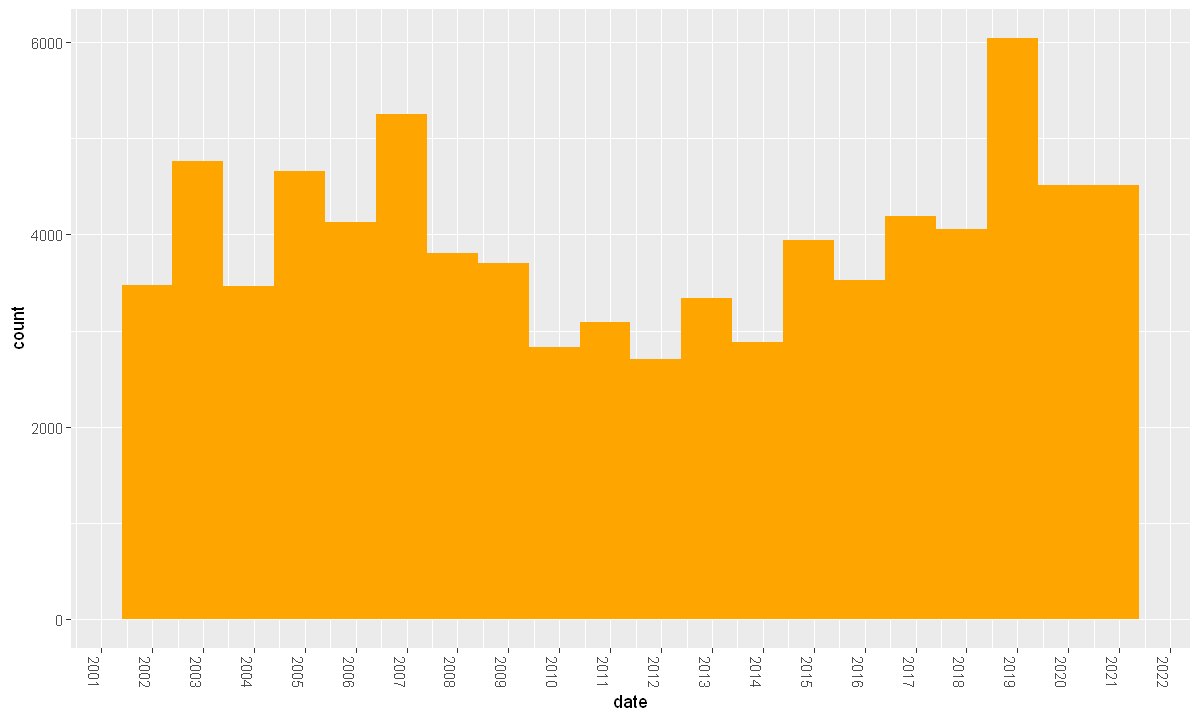

In [169]:
ggplot(bip, aes(date, weight=opp_cosponsor)) + 
geom_histogram( fill='orange', breaks=seq(as.Date('2001-05-27'), as.Date('2021-05-27'), by= "1 years")) +
scale_x_date(labels=date_format("%Y"), breaks=date_breaks('year')) +
theme(axis.text.x=element_text(angle = -90, hjust = 0))